# Import modules to run everything

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import ipywidgets as widgets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from re import search
%matplotlib inline 

# Import our dataset

In [45]:
# https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data Steven Rouk answer for error
# that occurred here.

# Deprecation error can be ignored.
car_sales = pd.read_csv("resources/data/car_prices.csv", on_bad_lines = 'skip')

In [3]:
# Display the first five rows of our data to check it is imported properly.
car_sales.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Descriptive Method

Here we describe the data to get some standard statistics such as mean, standard deviation, minimum, maximum, etc.

In [4]:
car_sales.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000



Here we plot a histogram of all the selling prices in our data

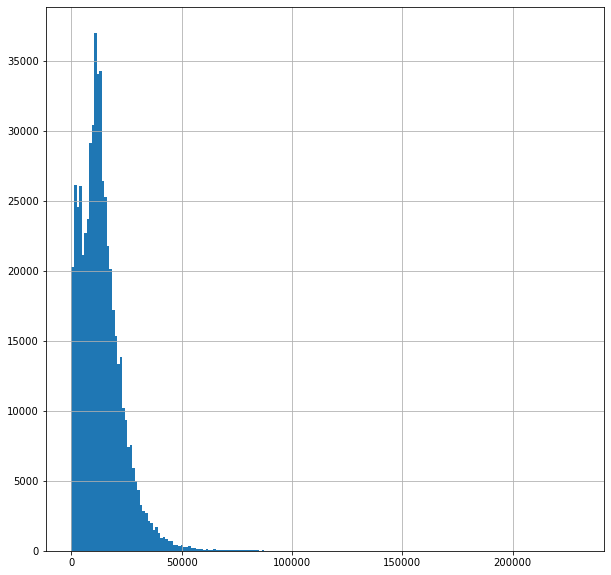

In [24]:
car_sales["sellingprice"].hist(figsize= (10, 10), bins = 200);


Here we plot a heat map of how each column in the dataset correlates to eachother. 
- Positive numbers signify a positive correlation with negative numbers meaning less correlation.

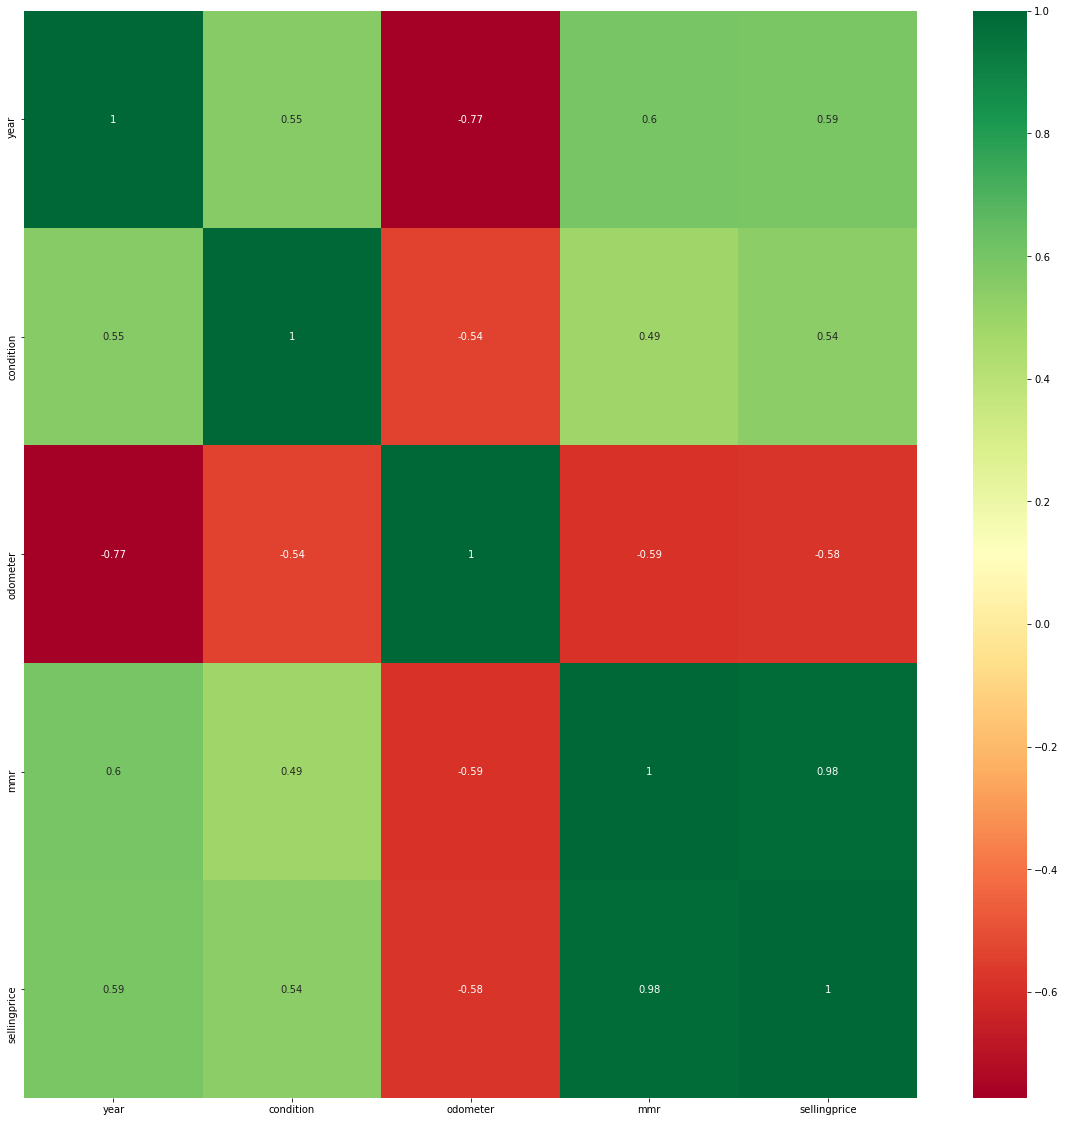

In [25]:
correlation = car_sales.corr()
top_corr_features = correlation.index
plt.figure(figsize=(20,20))

# Plot heat map
graph = sns.heatmap(car_sales[top_corr_features].corr(), annot=True, cmap="RdYlGn")


Here we plot each numerical value against eachother to display how they are related

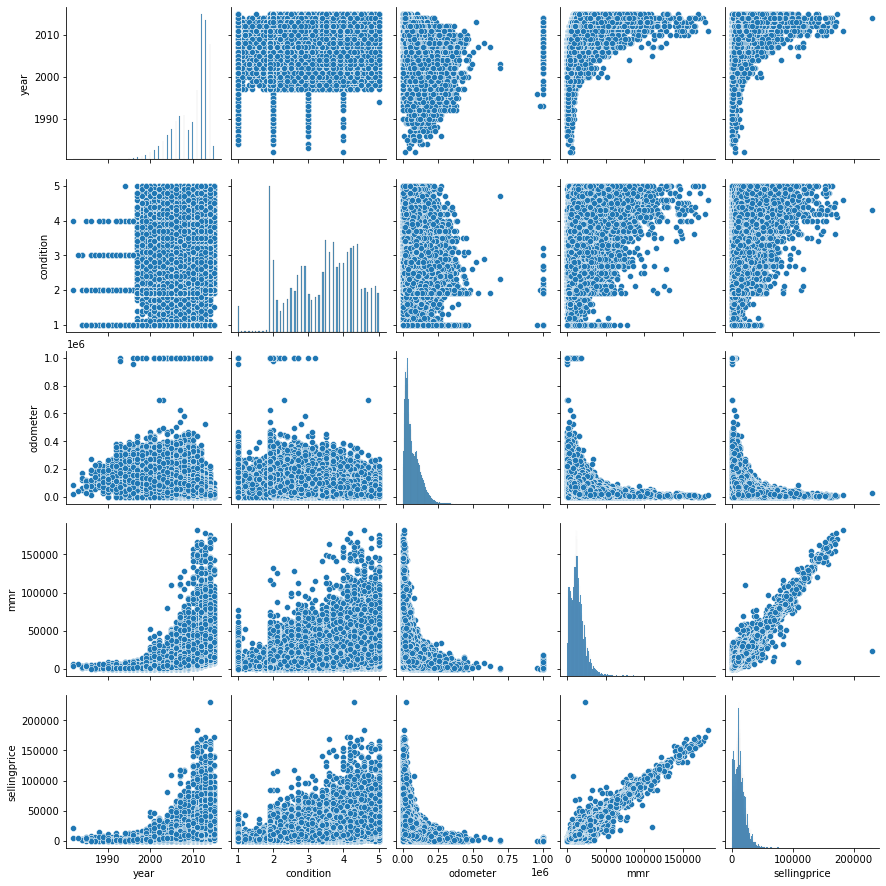

In [27]:
# Run this before importing seaborn if not already done !conda install -c anaconda seaborn -y
sns.pairplot(car_sales, dropna = True);

# Clean the data

In [28]:
# Drop data columns as to make modelling take less time, model may be less accurate though because of this
# Also drop the columns that don't have a great correlation.
car_sales = car_sales.drop(['vin', 'saledate', 'seller', 'trim', 'state',
                           'model', 'transmission', 'interior', 'odometer', 'body'], axis = 1)

In [36]:
# Drop Null rows, since this is a large data set it won't effect it too much.
car_sales = car_sales.dropna()

In [37]:
# Convert our categorical data to numbers
dummies = pd.get_dummies(car_sales, drop_first = True)
dummies

,year,condition,mmr,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,color_off-white,color_orange,color_pink,color_purple,color_red,color_silver,color_turquoise,color_white,color_yellow,color_—
0,2015,5.0,20500,21500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2015,5.0,20800,21500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2014,4.5,31900,30000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,4.1,27500,27750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,4.3,66000,67000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,4.5,35300,33000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
558807,2012,5.0,30200,30800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
558808,2012,4.8,29800,34000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558809,2015,3.8,15100,11100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# Create X (features matrix)
x = dummies.drop("sellingprice", axis = 1)

# Create y (labels)
y = dummies["sellingprice"]

# Load model from .pk1 file using pickle and make predictions/score

In [39]:
# Open model
reg_model = RandomForestRegressor()
reg_model = pickle.load(open("random_forest_model.pk1", "rb"))

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.99)

# Make predictions
y_preds = reg_model.predict(x_test)
y_preds

# Score model and store to variables
reg_model_score = reg_model.score(x_test, y_test)
mean_abs_err = metrics.mean_absolute_error(y_test, y_preds)


Plot the y_test and y_preds on a regression plot to see how close the model was in predicting prices.

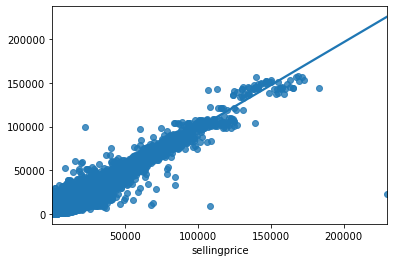

In [41]:
sns.regplot(x = y_test, y = y_preds);

# Create functions and widgets used for predicting a used car price

In [42]:
# calculate_car_price takes inputs from the prediction widget for regression analysis
# Output is a predicted used car price based on values provided


def calculate_car_price(year, quality, make, color):
    
    # Declaring variables and initializing
    cols = list(x.columns)
    
    # Get average mmr per car make
    mean = car_sales.groupby("make").mean()
    mean.mmr[make.value]

    # Year, Condition, MMR (mean from car_sales.describe()), Make, Body, Color
    # Set array to values we want to predict based on the values passed from the widget
    arr = [year.value, quality.value, mean.mmr[make.value], make.value, color.value] 
    
    # Get the index of where the value we want to find is equal to the column names
    make_index = cols.index("make_" + arr[3])
    color_index = cols.index("color_" + arr[4])

    # Year, Condition, MMR filling blank data into a format the prediction model will accept
    array_to_predict = [1, 0.0, 5555]
    for i in range(111):
        array_to_predict.append(0)

    # Get indeces for where values lie and change to proper ones
    array_to_predict[0] = arr[0] # Set year to predict
    array_to_predict[1] = arr[1] # Set condition to predict
    array_to_predict[2] = arr[2] # Set MMR
    array_to_predict[make_index] = 1 # Set Make to 1 to represent make
    array_to_predict[color_index] = 1 # Set color to 1 to represent correct color

    # Create a dataframe of the converted columns and then combine with the array we created for prediction
    cols_conv = pd.DataFrame(cols)
    df = pd.DataFrame(data = [array_to_predict], columns = cols_conv)

    predicted_price = reg_model.predict(df.values).astype(float)
    
    return predicted_price

In [43]:
# Initialize variables 
columns = list(dummies.columns) # Columns holds the list of all the column headers in our car_sales.csv
makes = []
colors = []

# Populate our widget make/color dropdown boxes
i = 0
for i in range(len(columns)):
    if search('make', columns[i]):
        makes.append(columns[i][5:])

    elif search('color', columns[i]):
        colors.append(columns[i][6:])

# Create actual dropdown
make = widgets.Dropdown(options = makes, description = "Make of car:")
year = widgets.Dropdown(options = range(1980,2022), description = "Year of car:")
color = widgets.Dropdown(options = colors, description = "Color of car:")
quality = widgets.Dropdown(options = np.arange(0, 5.5, .5).round(1), description = "Quality of car:")

# Create box
widgets_box = widgets.VBox([make, year, color, quality])

# List of widget box children for tab
children = [widgets_box]

# Initialize tab and set children
tab = widgets.Tab()
tab.children = children

# Box title
tab.set_title(0, 'Car Price Prediction')
tab

In [44]:
def button_clicked(_):
    # Link function with output
    predicted_price = calculate_car_price(year, quality, make, color)
    
    # On Button press do the following
    with out:
        out.clear_output()
        print("----Prediction----")
        print("Regression model predicts approximately $", f"{predicted_price[0]:.2f}", "dollars for your car.")
        print("----Error Analysis----")
        print('Mean Absolute Error:', mean_abs_err)
        print('Accuracy Score:', f"{reg_model_score * 100:.2f}%" )
    return

# calculate_prediction execution button harvest input from sliders
calc_button = widgets.Button(description='Calculate')
out = widgets.Output()

# Link button and function together using button method
calc_button.on_click(button_clicked)
# Display button and output together
widgets.VBox([calc_button,out])